## Name: Bhavesh Kewalramani
## Roll No.: A-25
## Section: A
## Semester: VII
## Shift: I
## Batch: A1

# PART(A): Apply Apriori Algorithm on the Online Retail Dataset.

### Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Create basket data using the transactions from Germany, encode it and consider only the transactions with more than 1 item only.

In [2]:
#importing the dataset and encoding it
online_retail = pd.read_csv('online_retail_II .csv',encoding="ISO-8859-1")

In [3]:
#printing the dataset values
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
#dropping the null/missing rows and columns
online_retail = online_retail.dropna()

In [5]:
#checking the names and other information about columns
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
#dropping all the rows who have negative Quantity
online_retail = online_retail[online_retail['Quantity']>=0]

In [7]:
#Creating a basket data of the country 'Germany'
basket_data = (online_retail[online_retail['Country']=='Germany'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [8]:
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Encoding the data
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

basket_data = basket_data.applymap(encode_units)
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#filtering the transaction where more than 1 item is bought
basket_data = basket_data[(basket_data > 0).sum(axis=1)>=2]
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Apply the apriori algorithm and find associations between the frequently bought items. Conclude which items are bought together.

In [11]:
#importing apriori from the library
from mlxtend.frequent_patterns import apriori

In [12]:
#applying the apriori algorithm on the basket data of germany
frequent_itemsets_Germany = apriori(basket_data,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets_Germany['length'] = frequent_itemsets_Germany['itemsets'].apply(lambda x: len(x))
frequent_itemsets_Germany

C:\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.845266,(POSTAGE),1
1,0.258661,(ROUND SNACK BOXES SET OF4 WOODLAND ),1
2,0.237875,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND )",2
3,0.166282,(ROUND SNACK BOXES SET OF 4 FRUITS ),1
4,0.159353,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS )",2
...,...,...,...
464,0.030023,(STARS GIFT TAPE ),1
465,0.030023,(STORAGE TIN VINTAGE DOILY ),1
466,0.030023,(TOADSTOOL MONEY BOX),1
467,0.030023,"(RETROSPOT TEA SET CERAMIC 11 PC , ROUND SNACK...",2


In [13]:
#importing the association rules library
from mlxtend.frequent_patterns import association_rules

In [14]:
#Forming the association rules between the frequently bought items
rules_Germany = association_rules(frequent_itemsets_Germany,metric='confidence',min_threshold=1).sort_values('confidence',ascending=False).reset_index(drop=True)

In [15]:
rules_Germany.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BLUE HARMONICA IN BOX ),(POSTAGE),0.050808,0.845266,0.050808,1.0,1.183060,0.007862,inf
1,(RED HARMONICA IN BOX ),(POSTAGE),0.048499,0.845266,0.048499,1.0,1.183060,0.007504,inf
2,"(COFFEE MUG APPLES DESIGN, ROUND SNACK BOXES S...",(POSTAGE),0.030023,0.845266,0.030023,1.0,1.183060,0.004646,inf
3,"(POSTAGE, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.030023,0.083141,0.030023,1.0,12.027778,0.027527,inf
4,"(LUNCH BAG APPLE DESIGN, ROUND SNACK BOXES SET...",(POSTAGE),0.030023,0.845266,0.030023,1.0,1.183060,0.004646,inf


### 3. Create basket data using the transactions from France and perform the above steps.

In [16]:
#Creating a basket data of the country 'France'
basket_data = (online_retail[online_retail['Country']=='France'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [17]:
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Encoding the data
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

basket_data = basket_data.applymap(encode_units)
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#filtering the transaction where more than 1 item is bought
basket_data = basket_data[(basket_data > 0).sum(axis=1)>=2]
basket_data

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#importing apriori from the library
from mlxtend.frequent_patterns import apriori

In [21]:
#applying the apriori algorithm on the basket data of france
frequent_itemsets_France = apriori(basket_data,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets_France['length'] = frequent_itemsets_France['itemsets'].apply(lambda x: len(x))
frequent_itemsets_France

C:\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.793566,(POSTAGE),1
1,0.195710,(RABBIT NIGHT LIGHT),1
2,0.187668,(RED TOADSTOOL LED NIGHT LIGHT),1
3,0.179625,(PLASTERS IN TIN WOODLAND ANIMALS),1
4,0.176944,(PLASTERS IN TIN CIRCUS PARADE ),1
...,...,...,...
782,0.032172,"(LUNCH BAG RED RETROSPOT, DOLLY GIRL LUNCH BOX...",3
783,0.032172,"(POSTAGE, LUNCH BAG WOODLAND, DOLLY GIRL LUNCH...",3
784,0.032172,"(POSTAGE, DOLLY GIRL LUNCH BOX, ROUND SNACK BO...",3
785,0.032172,"(POSTAGE, DOLLY GIRL MINI BACKPACK, WOODLAND M...",3


In [22]:
#importing the association rules library
from mlxtend.frequent_patterns import association_rules

In [23]:
#Forming the association rules between the frequently bought items
rules_France=association_rules(frequent_itemsets_France,metric='confidence',min_threshold=1).sort_values('confidence',ascending=False).reset_index(drop=True)

In [24]:
rules_France.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.080429,0.793566,0.080429,1.0,1.260135,0.016603,inf
1,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET OF ...",(SET/6 RED SPOTTY PAPER PLATES),0.034853,0.134048,0.034853,1.0,7.460000,0.030181,inf
2,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",(SET/6 RED SPOTTY PAPER PLATES),0.032172,0.134048,0.032172,1.0,7.460000,0.027859,inf
3,"(PACK OF 20 SKULL PAPER NAPKINS, SET/20 RED RE...",(PACK OF 6 SKULL PAPER PLATES),0.032172,0.058981,0.032172,1.0,16.954545,0.030274,inf
4,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(POSTAGE),0.032172,0.793566,0.032172,1.0,1.260135,0.006641,inf


### 4. Use appropriate visualization and show the comparison between different countries to conclude. For example, compare the most frequently purchased item in different countries.

In [25]:
countries = list(set(online_retail['Country'].unique()))

In [26]:
countries

['Cyprus',
 'Unspecified',
 'Finland',
 'Lithuania',
 'Bahrain',
 'Switzerland',
 'RSA',
 'Malta',
 'Australia',
 'Belgium',
 'Italy',
 'Austria',
 'Norway',
 'Czech Republic',
 'United Kingdom',
 'Denmark',
 'Canada',
 'USA',
 'Spain',
 'Portugal',
 'France',
 'Channel Islands',
 'Brazil',
 'Netherlands',
 'United Arab Emirates',
 'Japan',
 'Sweden',
 'Lebanon',
 'Iceland',
 'Germany',
 'Saudi Arabia',
 'Greece',
 'Singapore',
 'European Community',
 'Poland',
 'Israel',
 'EIRE']

In [27]:
import re,string
d1={}
d2={}
for i in countries:
    basket_data = str(online_retail[online_retail['Country']==i].groupby(['Description'])['Quantity'].sum().nlargest(1))
    basket_data = basket_data.split('\n')[1]
    pattern = re.findall(r'\d{0,6}$', basket_data)[0] 
    cleaned = basket_data.rstrip(string.digits)
    d1[i]=int(pattern)
    d2[i]=cleaned

In [28]:
d1

{'Cyprus': 384,
 'Unspecified': 36,
 'Finland': 480,
 'Lithuania': 48,
 'Bahrain': 96,
 'Switzerland': 636,
 'RSA': 12,
 'Malta': 81,
 'Australia': 2952,
 'Belgium': 480,
 'Italy': 240,
 'Austria': 288,
 'Norway': 576,
 'Czech Republic': 72,
 'United Kingdom': 80995,
 'Denmark': 288,
 'Canada': 504,
 'USA': 88,
 'Spain': 729,
 'Portugal': 240,
 'France': 4000,
 'Channel Islands': 407,
 'Brazil': 24,
 'Netherlands': 4801,
 'United Arab Emirates': 72,
 'Japan': 3408,
 'Sweden': 2916,
 'Lebanon': 24,
 'Iceland': 240,
 'Germany': 1233,
 'Saudi Arabia': 12,
 'Greece': 48,
 'Singapore': 384,
 'European Community': 24,
 'Poland': 144,
 'Israel': 120,
 'EIRE': 1632}

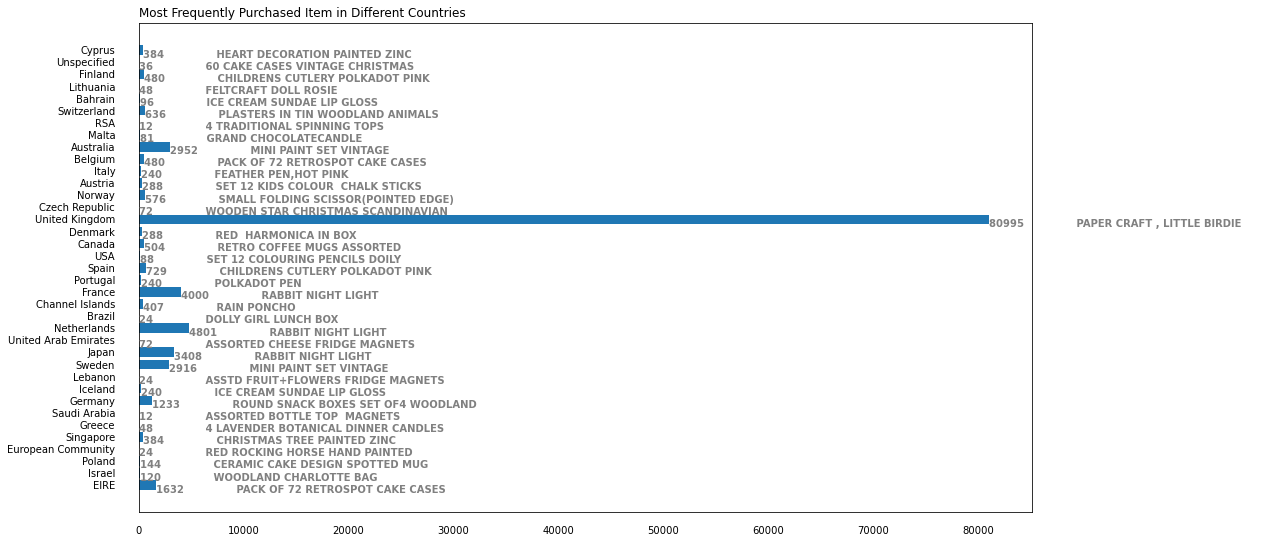

In [29]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(list(d1.keys()),list(d1.values()))
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 20)
items = list(d2.values())
k=0
for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+1,
             str(round((i.get_width()), 3))+"               "+items[k],
             fontsize = 10, fontweight ='bold',
             color ='grey')
    k+=1
ax.set_title('Most Frequently Purchased Item in Different Countries',loc ='left')
ax.invert_yaxis()